## Lights, Camera, Data! Exploring The IMDb Movie Datasets

<img src="IMDB.png" width=950>

## The Data

The two datasets:

### **imdb.csv**
| Column         | Description                            |
|----------------|----------------------------------------|
| `id`           | Unique ID of the movie                 |
| `Poster_Link`  | Poster Link of Movie                   |
| `Certificate`  | Certificate of the Movie               |
| `IMDB_Rating`  | IMBD Rating of the Movie               |
| `Meta_score`   | Metascore earned by the Movie          |
| `Star1`        | First Star Cast                        |
| `Star2`        | Second Star Cast                       |
| `Star3`        | Third Star Cast                        |
| `Star4`        | Fourth Star Cast                       |
| `No_of_Votes`  | Number of Votes                        |
| `Gross`        | Gross earnings of the Movie            |

### **movies.csv**
| Column          | Description                           |
|-----------------|---------------------------------------|
| `id`            | Unique ID of the movie                |
| `Series_Title`  | Name of the Movie                     |
| `Released_Year` | Released Year of the Movie            |
| `Runtime`       | Total Runtime of the Movie            |
| `Genre`         | Genre of the Movie                    |
| `Overview`      | Overview of the Movie                 |
| `Director`      | Name of the Director                  |


## Key Insights

- The dataset contains 21 different movie genres, and 202 unique genre combinations

- There doesn't seem to be a major influence of movie `Genre` on its `IMDB_Rating`, as we can see in the case of `horror` (lowest rating) and `war` (highest rating) movies. Therefore, the ratings differences aren't significant enough to conclude a definitive relationship between the two attributes.

- Average movie `Runtime` is about 2.3 hours long. The shortest movie is 45 minutes long, while the longest is 5.21 hours.

- There seems to be a weak positive relationship between a movie's `Runtime` and `IMDB_Rating`.

- `Christopher Nolan`’s `Crime` movies have the highest rating of 9.0 in the entire dataset.

- `Irvin Kershner` and  `Roberto Benigni` were top directors for two genres (`Fantasy`, `Adventure`) and (`Romance`, `Comedy`) respectively.
 Also, the `Comedy` and `Thriller` genres each had two top directors with the same ratings.

## Step 0: Importing the Libraries

In [580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Loading the Data

### Task 1.1: Loading the IMDb Dataset

In [581]:
imdb = pd.read_csv('imbd.csv')

### Task 1.2: Loading the Movies Dataset

In [582]:
movies = pd.read_csv('movies.csv')

### Task 1.3: Merging the Datasets

In [583]:
imdb_movies = imdb.merge(movies, on='id')

## Step 2: Exploring the Data

### Task 2.1: Displaying the First Few Rows of the Data

In [584]:
imdb_movies.head()

,id,Poster_Link,Certificate,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Series_Title,Released_Year,Runtime,Genre,Overview,Director
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,A,9.3,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",The Shawshank Redemption,1994,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,A,9.2,100.0,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",The Godfather,1972,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,UA,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",The Dark Knight,2008,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan
3,3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,A,9.0,90.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",The Godfather: Part II,1974,202 min,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola
4,4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,U,9.0,96.0,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",12 Angry Men,1957,96 min,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet


### Task 2.2: Checking for Missing Values

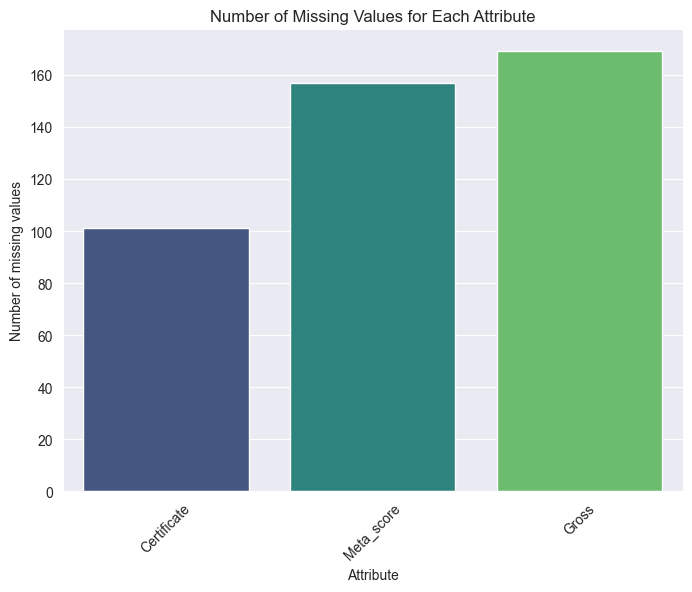

Certificate    101
Meta_score     157
Gross          169
dtype: int64

In [585]:
# Find the number of missing values in the imdb_movies dataset, and store the result as 'movies_missing_info'.
movies_missing_info = imdb_movies.isna().sum()

# let's reduce the df to contain only the columns with missing values.
movies_missing_info = movies_missing_info[movies_missing_info > 0]

plt.figure(figsize=(8, 6))
sns.barplot(x=movies_missing_info.index, y=movies_missing_info.values, hue=movies_missing_info.index, palette='viridis')
plt.xlabel('Attribute')
plt.ylabel('Number of missing values')
plt.title('Number of Missing Values for Each Attribute')
plt.xticks(rotation=45)

plt.show()
movies_missing_info

There seems to be a noticeable number of information missing from the data, specially in the `Certificate`, `Meta_score`, and `Gross` columns. I wouldn't go as far as dropping these rows with missing values since I can still utilize the other attributes of these same rows for other insights.

### Extra Task 2.2.B: Checking invalid values

In [586]:
# I will consider the missing certificates as unrated for now
# in real life this could be wrong since we might find the certificate later for these movies.
# but since we're not modifying the original file then it's alright.
imdb_movies['Certificate'] = imdb_movies['Certificate'].fillna('Unrated')

# Also I checked that there is no UA certificate, so it's a typo of U/A
imdb_movies.loc[imdb_movies['Certificate'] == 'UA', 'Certificate'] = 'U/A'

imdb_movies['Certificate'].drop_duplicates()


0             A
2           U/A
4             U
18        PG-13
24            R
30      Unrated
32           PG
51            G
82       Passed
91        TV-14
197          16
198       TV-MA
287          GP
307    Approved
349       TV-PG
Name: Certificate, dtype: object

### Task 2.3: Checking the Data Types 

In [587]:
imdb_movies.dtypes

id                 int64
Poster_Link       object
Certificate       object
IMDB_Rating      float64
Meta_score       float64
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
Series_Title      object
Released_Year     object
Runtime           object
Genre             object
Overview          object
Director          object
dtype: object

### Task 2.4: Descriptive Statistics

 We need to modify the `Runtime` and `Gross` columns in order to be able to find statistical insights about them.

In [588]:
imdb_movies['Runtime'] = imdb_movies['Runtime'].str.replace(' min', '').astype(int)
imdb_movies['Gross'] = imdb_movies['Gross'].str.replace(',', '').astype(float)

In [589]:
# dropping the id column since descriptive stats aren't meaningful for it
imdb_movies.drop(columns='id').describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime
count,1000.000000,843.000000,1.000000e+03,8.310000e+02,1000.000000
mean,7.949300,77.971530,2.736929e+05,6.803475e+07,122.891000
std,0.275491,12.376099,3.273727e+05,1.097500e+08,28.093671
min,7.600000,28.000000,2.508800e+04,1.305000e+03,45.000000
25%,7.700000,70.000000,5.552625e+04,3.253559e+06,103.000000
50%,7.900000,79.000000,1.385485e+05,2.353089e+07,119.000000
75%,8.100000,87.000000,3.741612e+05,8.075089e+07,137.000000
max,9.300000,100.000000,2.343110e+06,9.366622e+08,321.000000


## Step 3: Analyzing the Distribution of IMDb Ratings by Genre

### Task 3.1: Identifying the Unique Genres

In [590]:
## In case of unique genres.
unique_genres = set()
for genres in imdb_movies['Genre']:
    for genre in genres.split(', '):
        unique_genres.add(genre)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

The dataset contains 21 different movie genres, and 202 unique genre combinations

### Task 3.2: Calculating the Average IMDb Rating for Each Genre

In [591]:
# In case of unique genres. 
genre_list = []
for key, row in imdb_movies.iterrows():
    for genre in row['Genre'].split(', '):
        genre_list.append(  {'Genre':genre ,
                       'IMDB_Rating': row['IMDB_Rating'],
                        'Director': row['Director'],
                       'Gross': row['Gross'],
                       'Meta_score': row['Meta_score']} )

genre_groups = pd.DataFrame(genre_list).groupby('Genre')
avg_genre_ratings =  genre_groups['IMDB_Rating'].mean()


avg_genre_ratings.sort_values(ascending=False)

Genre
War          8.013725
Western      8.000000
Film-Noir    7.989474
Sci-Fi       7.977612
Mystery      7.967677
Drama        7.959392
Crime        7.954545
History      7.953571
Adventure    7.952041
Action       7.948677
Musical      7.947059
Biography    7.935780
Fantasy      7.931818
Animation    7.930488
Sport        7.926316
Romance      7.925600
Music        7.914286
Family       7.912500
Thriller     7.909489
Comedy       7.903433
Horror       7.887500
Name: IMDB_Rating, dtype: float64

### Task 3.3: Visualizing the Average IMDb Ratings by Genre

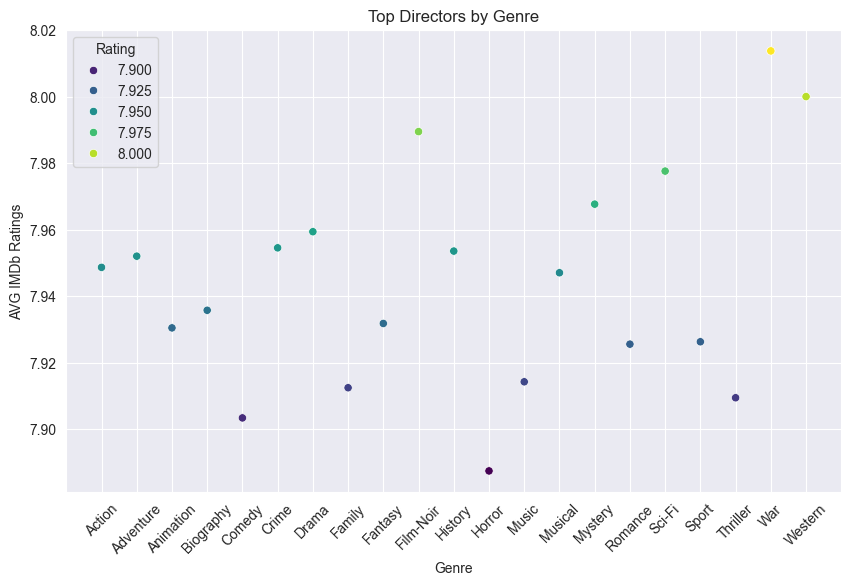

In [592]:
## In case of unique genres.
plt.figure(figsize=(10,6))
sns.scatterplot(x=avg_genre_ratings.index, y=avg_genre_ratings.values, hue=avg_genre_ratings.values, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('AVG IMDb Ratings')
plt.title('Top Directors by Genre')
plt.xticks(rotation=45)
plt.legend(title='Rating')

plt.show()

There doesn't seem to be a major influence of movie genre on its rating, as we can see in the case of horror (lowest rating) and war (highest rating) movies. Therefore, the ratings differences aren't significant enough to conclude a definitive relationship between the two attributes.

## Step 4: Investigating the Relationship Between Movie Runtime and IMDb Ratings

### Task 4.1: Analyzing the Summary Statistics for Movie Runtime

In [593]:
imdb_movies['Runtime'].describe()

count    1000.000000
mean      122.891000
std        28.093671
min        45.000000
25%       103.000000
50%       119.000000
75%       137.000000
max       321.000000
Name: Runtime, dtype: float64

Average movie runtime is about 2.3 hours long, with the shortest movie having runtime of 45 minutes, and the longest is 5.21 hours long.

### Task 4.2: Creating a Scatter Plot of Movie Runtime vs. IMDb Rating

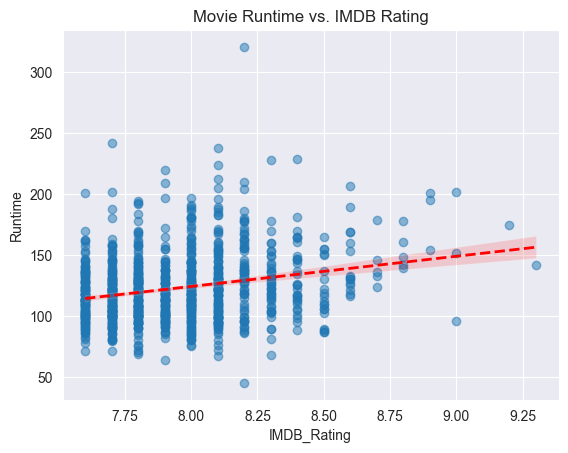

,IMDB_Rating,Runtime
IMDB_Rating,1.000000,0.243096
Runtime,0.243096,1.000000


In [594]:
sns.regplot(x='IMDB_Rating', y='Runtime', data=imdb_movies, scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 2, 'linestyle': '--', 'color':'red'})

plt.title('Movie Runtime vs. IMDB Rating')
plt.show()

imdb_movies[['IMDB_Rating', 'Runtime']].corr()

There seems to be a weak positive relationship between a movie's runtime and rating.

## Step 5: Identifying the Top-Rated Directors in Each Genre

### Task 5.1: Extracting the Top Director for Each Genre

In [595]:
# In case of unique chunk of genres.
## This method finds the top directors by genre, given a specific judging criteria.
def get_top_directors_by(attribute):
    top_dir_func = lambda x: x[x[attribute] == x[attribute].max()][['Director',attribute, 'Series_Title']]
    filtered_movies = imdb_movies.dropna(subset=[attribute])
    return filtered_movies.groupby('Genre').apply(top_dir_func, include_groups=False)\
                                           .sort_values(attribute, ascending=False)

In [596]:
top_directors_by_genre = get_top_directors_by('IMDB_Rating')
top_directors_by_genre

,,Director,IMDB_Rating,Series_Title
Genre,,,,
Drama,0,Frank Darabont,9.3,The Shawshank Redemption
"Crime, Drama",1,Francis Ford Coppola,9.2,The Godfather
"Action, Crime, Drama",2,Christopher Nolan,9.0,The Dark Knight
"Action, Adventure, Drama",5,Peter Jackson,8.9,The Lord of the Rings: The Return of the King
"Biography, Drama, History",7,Steven Spielberg,8.9,Schindler's List
...,...,...,...,...
"Action, Crime, Mystery",951,Steven Spielberg,7.6,Minority Report
"Action, Adventure, Mystery",914,Guy Ritchie,7.6,Sherlock Holmes
"Action, Adventure, Family",927,David Yates,7.6,Harry Potter and the Half-Blood Prince


Wow, `Frank Darabont`'s Drama movie `The Shawshank Redemption` have the highest rating of 9.3 in the entire dataset.
But let's be fair, look at the top 4 directors and their movies, we all recognize these :)

In [597]:
# In case of unique genres.
## This method finds the top directors by genre, given a specific judging criteria.
def get_top_unique_genre_directors_by(attribute):
    # find the avg 'attribute' for each genre and director
    genre_director_group = pd.DataFrame(genre_list).groupby(['Genre', 'Director'])
    avg_genre_director = genre_director_group[attribute].mean().reset_index()

    # find the max avg for each genre
    max_avg_per_genre = avg_genre_director.groupby('Genre')[attribute].max()
    is_max = lambda current: current[attribute] == max_avg_per_genre.loc[current['Genre']]

    # filter for directors with max avg in their genres and return the result.
    return avg_genre_director[avg_genre_director.agg(is_max, axis=1)].sort_values(attribute, ascending=False)

In [598]:
top_genre_director_ratings = get_top_unique_genre_directors_by('IMDB_Rating')
top_genre_director_ratings

,Genre,Director,IMDB_Rating
603,Crime,Christopher Nolan,9.000
858,Drama,Frank Darabont,8.950
96,Action,Peter Jackson,8.800
183,Adventure,Irvin Kershner,8.700
1611,Sci-Fi,Lana Wachowski,8.700
1236,Fantasy,Irvin Kershner,8.700
541,Comedy,Roberto Benigni,8.600
402,Biography,Thomas Kail,8.600
1705,Thriller,Jonathan Demme,8.600
429,Comedy,Bong Joon Ho,8.600


Wow, `Christopher Nolan`'s Crime movies have the highest rating of 9.0 in the entire dataset.

### Task 5.2: Counting the Occurrences of Top Directors by Genre

In [599]:
# In case of unique chuk of genres
top_directors_counts = top_directors_by_genre.reset_index('Genre')[['Genre', 'Director']].value_counts()
top_directors_counts

Genre                      Director         
Adventure, Fantasy         Peter Jackson        2
Comedy, Drama, Musical     Rajkumar Hirani      2
Drama, Horror, Sci-Fi      James Whale          2
Action, Adventure          Christopher Nolan    1
Action, Adventure, Crime   Daniel Monzón        1
                                               ..
Mystery, Sci-Fi, Thriller  Terry Gilliam        1
Mystery, Thriller          Alfred Hitchcock     1
                           Christopher Nolan    1
Thriller                   Terence Young        1
Western                    Sergio Leone         1
Name: count, Length: 232, dtype: int64

`Peter Jackson`, `Rajkumar Hirani`, and `James Whale` all were top directors in their genres, each with two occurrences.

In [600]:
# In case of unique genres.
top_genre_director_ratings.groupby('Genre')['Director'].value_counts()

Genre      Director            
Action     Peter Jackson           1
Adventure  Irvin Kershner          1
Animation  Roger Allers            1
Biography  Thomas Kail             1
Comedy     Bong Joon Ho            1
           Roberto Benigni         1
Crime      Christopher Nolan       1
Drama      Frank Darabont          1
Family     Frank Capra             1
Fantasy    Irvin Kershner          1
Film-Noir  Billy Wilder            1
History    Thomas Kail             1
Horror     Ridley Scott            1
           Stanley Kubrick         1
Music      Roman Polanski          1
Musical    Hrishikesh Mukherjee    1
Mystery    Masaki Kobayashi        1
Romance    Roberto Benigni         1
Sci-Fi     Lana Wachowski          1
Sport      Majid Majidi            1
Thriller   Bong Joon Ho            1
           Jonathan Demme          1
War        Steven Spielberg        1
Western    Quentin Tarantino       1
Name: count, dtype: int64

`Irvin Kershner` and  `Roberto Benigni` were top directors for two genres (Fantasy, Adventure) and (Romance, Comedy) respectively.
 Also, the `Comedy` and `Thriller` genres each had two top directors with the same ratings.

### Task 5.3: Visualizing the Top Directors by Genre

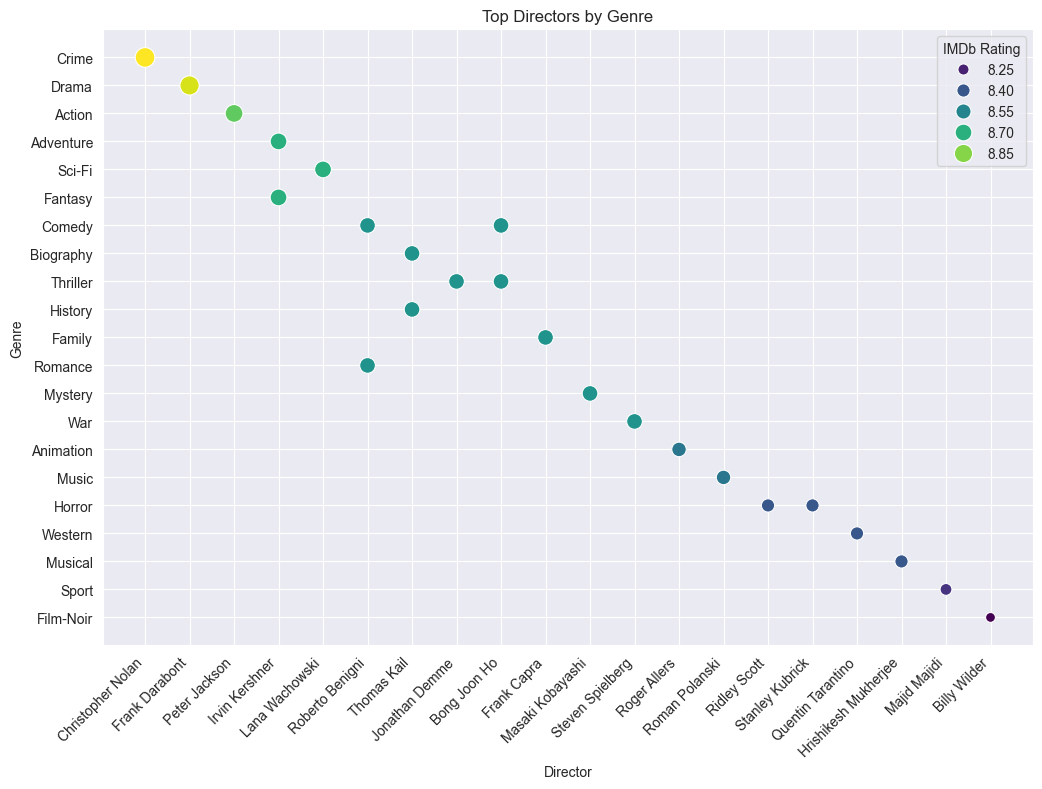

In [601]:
# Plotting using seaborn scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Director', y='Genre', size='IMDB_Rating', data=top_genre_director_ratings,
                sizes=(50, 200), hue='IMDB_Rating', palette='viridis')
plt.xlabel('Director')
plt.ylabel('Genre')
plt.title('Top Directors by Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='IMDb Rating')
plt.show()

## Step 6: Exploring Additional Questions

### Question 1: How does the movie certificate (G, PG, PG-13, R, etc.) impact the IMDb ratings?

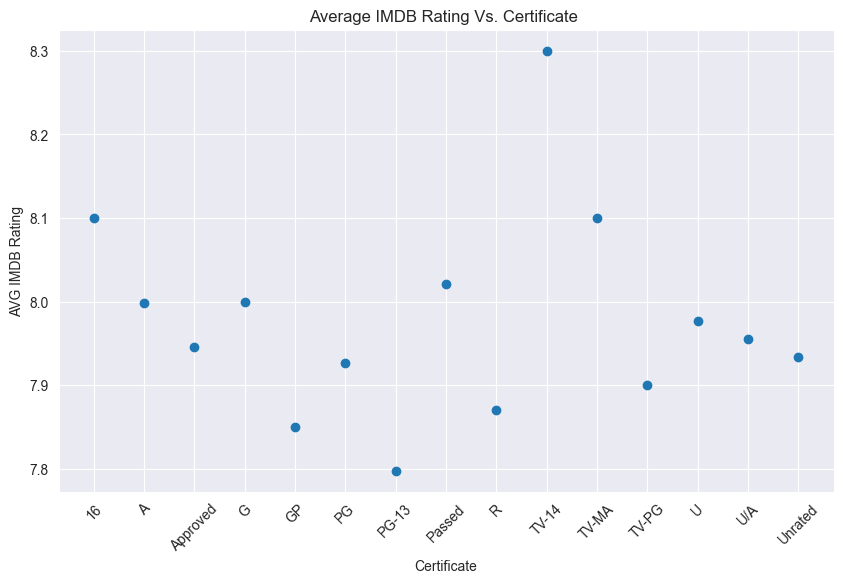

In [602]:
## bar chart might be preferable here but the difference in the rating isn't obvious as much as in the scatter so i used it
cert_group = imdb_movies.groupby('Certificate', dropna='True')['IMDB_Rating'].mean()

plt.figure(figsize=(10,6))
plt.scatter(cert_group.index, cert_group.values)
plt.xlabel('Certificate')
plt.ylabel('AVG IMDB Rating')
plt.title("Average IMDB Rating Vs. Certificate ")
plt.xticks(rotation=45)
plt.show()

There seems to be a slight influence of a movie's certification over its rating. For example, PG-13 movies had 7.8 rating while TV-14 had 8.3 which is a bit better. However, most of the certificates had rating ranged between [7.9, 8.1], so a correlation isn't significant nor obvious. 

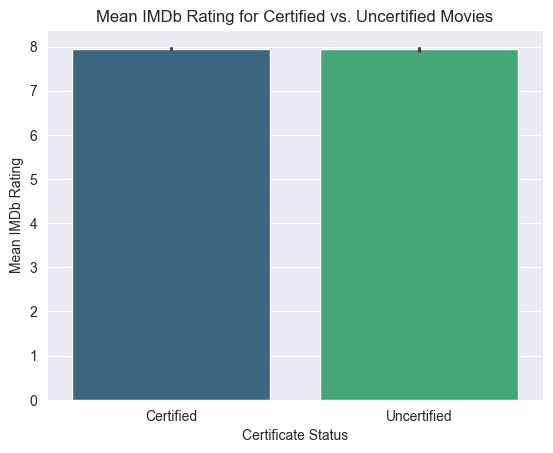

In [603]:
# Create a new column for certification status (Certified/Uncertified)
imdb_movies['Certificate Status'] = imdb_movies['Certificate'].apply(lambda x: 'Certified' if x != 'Unrated' else 'Uncertified')

sns.barplot(x='Certificate Status', y='IMDB_Rating', data=imdb_movies, hue='Certificate Status', palette='viridis')

plt.xlabel('Certificate Status')
plt.ylabel('Mean IMDb Rating')
plt.title('Mean IMDb Rating for Certified vs. Uncertified Movies')
plt.show()

Even when comparing the mean rating of certified and uncertified movies, there isn't a clear difference between the two.

### Question 2: What is the relationship between the Metascore and IMDb ratings of movies?

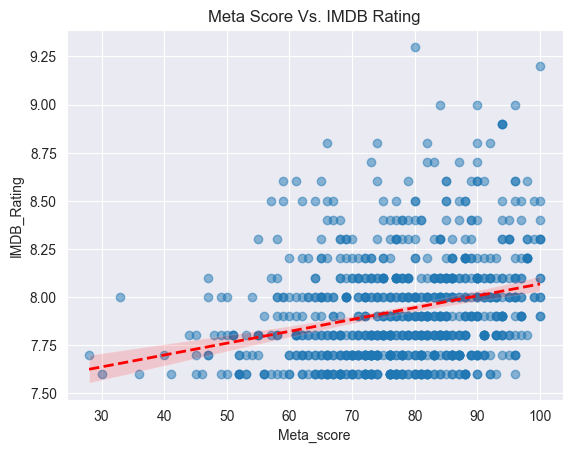

In [604]:
# filter for rows with known meta score.
movies_with_metascore = imdb_movies[imdb_movies['Meta_score'].notnull()][['Meta_score', 'IMDB_Rating']]

sns.regplot(x='Meta_score', y='IMDB_Rating', data=movies_with_metascore, scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 2, 'linestyle': '--', 'color':'red'})

plt.title('Meta Score Vs. IMDB Rating')
plt.show()

There seems to be a weak positive linear relationship between Meta score and the movie's rating.

### Question 3: Are there any trends in the gross earnings of movies across different genres?

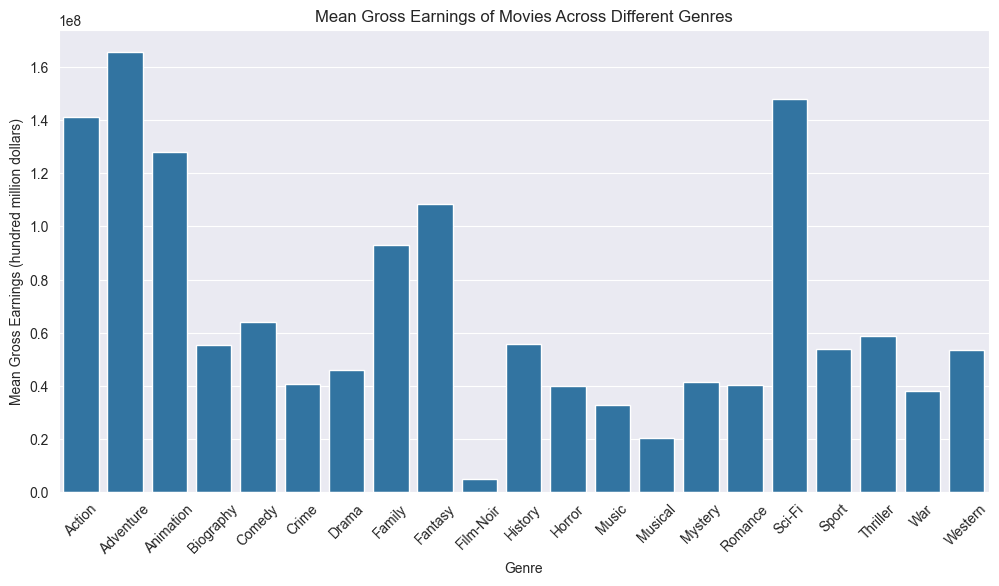

In [605]:
# Calculate the mean gross earnings for each genre
avg_genre_grosses = genre_groups['Gross'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_genre_grosses)
plt.xlabel('Genre')
plt.ylabel('Mean Gross Earnings (hundred million dollars)')
plt.title('Mean Gross Earnings of Movies Across Different Genres')
plt.xticks(rotation=45)
plt.show()

### Extra on Top Directors.

### Question 4: Top Director by unique genre and meta score

In [606]:
get_top_unique_genre_directors_by('Meta_score')

,Genre,Director,Meta_score
334,Biography,David Lean,100.0
997,Drama,Michael Curtiz,100.0
757,Drama,Alexander Mackendrick,100.0
1464,Mystery,Orson Welles,100.0
1784,War,Michael Curtiz,100.0
1276,Film-Noir,Alexander Mackendrick,100.0
602,Crime,Charles Laughton,99.0
1408,Musical,Stanley Donen,99.0
688,Crime,Orson Welles,99.0
1544,Romance,Michael Curtiz,98.5


Nice, There are 4 different directors who directed movies with meta score of 100! But look at `Alexander Mackendrick` and `Michael Curtiz` each directing 2 movies with that score!

### Question 5: Top Director by genre and meta score

In [607]:
get_top_directors_by('Meta_score')

,,Director,Meta_score,Series_Title
Genre,,,,
"Adventure, Biography, Drama",116,David Lean,100.0,Lawrence of Arabia
Drama,491,Richard Linklater,100.0,Boyhood
"Drama, Film-Noir",440,Alexander Mackendrick,100.0,Sweet Smell of Success
"Drama, Film-Noir, Romance",559,Alfred Hitchcock,100.0,Notorious
Drama,274,Ingmar Bergman,100.0,Fanny och Alexander
...,...,...,...,...
"Action, Adventure, Mystery",914,Guy Ritchie,57.0,Sherlock Holmes
"Horror, Mystery, Sci-Fi",271,John Carpenter,57.0,The Thing
"Action, Drama",784,Edward Zwick,55.0,The Last Samurai


What a tough decision to make.. There are 10 different directors who directed movies with meta score of 100! But look at `Alfred Hitchcock` directing 3 movies with that score!

###  Question 5: Top Director by unique genre and gross

In [608]:
get_top_unique_genre_directors_by('Gross')

,Genre,Director,Gross
773,Drama,Anthony Russo,8.583730e+08
1240,Fantasy,James Cameron,7.605076e+08
1525,Romance,James Cameron,6.593254e+08
145,Adventure,Anthony Russo,5.512599e+08
8,Action,Anthony Russo,5.512599e+08
603,Crime,Christopher Nolan,5.348584e+08
1599,Sci-Fi,Gareth Edwards,5.321773e+08
1209,Family,Steven Spielberg,4.351106e+08
285,Animation,Josh Cooley,4.340380e+08
488,Comedy,Josh Cooley,4.340380e+08


`Anthony Russo` is the top director in `Drama` genre with the highest movie gross in the entire dataset with a gross over 858 million dollars!

### Question 6: Top Director by genre and gross

In [609]:
get_top_directors_by('Gross')

,,Director,Gross,Series_Title
Genre,,,,
"Action, Adventure, Sci-Fi",477,J.J. Abrams,936662225.0,Star Wars: Episode VII - The Force Awakens
"Action, Adventure, Drama",59,Anthony Russo,858373000.0,Avengers: Endgame
"Action, Adventure, Fantasy",623,James Cameron,760507625.0,Avatar
"Drama, Romance",652,James Cameron,659325379.0,Titanic
"Animation, Action, Adventure",891,Brad Bird,608581744.0,Incredibles 2
...,...,...,...,...
"Comedy, Music",530,Rob Reiner,188751.0,This Is Spinal Tap
"Animation, Action, Fantasy",796,Yoshiaki Kawajiri,151086.0,Vampire Hunter D: Bloodlust
"Adventure, Drama, Musical",247,Ashutosh Gowariker,70147.0,Lagaan: Once Upon a Time in India


`J. J. Abrams` is the top director in `Action, Adventure, Sci-Fi` genre with the highest movie gross in the entire dataset with a gross over 936 million dollars! And again, we can't be surprised, I mean it's `Star Wars`.